# Capstone 2

## Polish Bankruptcy

## Exploratory Data Analysis

# Import Statements

In [1]:
#import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Load Data

In [2]:
#load combined data, column keys and missing value data

bankruptcy_data = pd.read_csv('bankruptcy_data_comb.csv')
data_columns = pd.read_csv('column_key.csv')
missing_percent = pd.read_csv('missing_val_perc.csv')

In [3]:
# check data loaded correctly

missing_percent.sort_values(by='count', ascending = False)

,Unnamed: 0,count,%
36,X37,18984,43.736897
20,X21,5854,13.486925
26,X27,2764,6.367930
59,X60,2152,4.957954
44,X45,2147,4.946435
...,...,...,...
56,X57,7,0.016127
58,X59,7,0.016127
54,X55,1,0.002304
64,Class,0,0.000000


In [4]:
# check data loaded correctly

bankruptcy_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Class,Year
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0,1
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0,1
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0,1
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0,1
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0,1


In [5]:
# check column dictionary loaded correctly

data_columns.head()

,Variable,Ratio
0,X1,net profit / total assets
1,X2,total liabilities / total assets
2,X3,working capital / total assets
3,X4,current assets / short-term liabilities
4,X5,[(cash + short-term securities + receivables -...


In [6]:
#bankruptcy_data['X1'].hist(bins=10)
#bankruptcy_data['X1'].mean().boxplot()

#for column in bankruptcy_data:
#    plt.figure()
#    bankruptcy_data.boxplot([column])
#bankruptcy_data['X1'].describe()

#bins=10
#logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#plt.subplot(212)
#plt.hist(bankruptcy_data['X1'], bins=logbins)
#plt.xscale('log')
#plt.show()


#np.log(bankruptcy_data['X1']).plot.hist(bins=8)

#plt.hist(bankruptcy_data['X1'], bins=np.logspace(start=np.log10(10), stop=np.log10(15), num=10))
#plt.gca().set_xscale("log")
#plt.show()

In [7]:
# display missing info

missing_percent.info

<bound method DataFrame.info of    Unnamed: 0  count         %
0          X1      8  0.018431
1          X2      8  0.018431
2          X3      8  0.018431
3          X4    134  0.308720
4          X5     89  0.205046
..        ...    ...       ...
61        X62    127  0.292593
62        X63    134  0.308720
63        X64    812  1.870752
64      Class      0  0.000000
65       Year      0  0.000000

[66 rows x 3 columns]>

In [8]:
# check for zero values in first column

bankruptcy_data['X1'].isin([0]).sum()

240

In [9]:
#check for null entries in first column

bankruptcy_data['X1'].isnull().sum()

8

<AxesSubplot:>

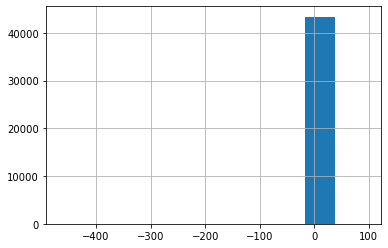

In [10]:
# histogram of first column

bankruptcy_data['X1'].hist(bins=10)

In [11]:
# display first column statistics

bankruptcy_data['X1'].describe()

count    43397.000000
mean         0.035160
std          2.994109
min       -463.890000
25%          0.003430
50%          0.049660
75%          0.129580
max         94.280000
Name: X1, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([6.4000e+01, 4.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00,
        0.0000e+00, 6.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00,
        4.0000e+00, 5.0000e+00, 7.0000e+00, 5.0000e+00, 7.0000e+00,
        8.0000e+00, 1.7000e+01, 7.0000e+00, 9.0000e+00, 1.1000e+01,
        8.0000e+00, 1.1000e+01, 1.6000e+01, 1.8000e+01, 1.1000e+01,
        2.1000e+01, 2.9000e+01, 3.2000e+01, 4.6000e+01, 2.7000e+01,
        5.2000e+01, 6.0000e+01, 7.6000e+01, 9.0000e+01, 1.1900e+02,
        1.3300e+02, 1.7200e+02, 2.1800e+02, 2.9900e+02, 4.1800e+02,
        5.9200e+02, 8.4100e+02, 1.1430e+03, 1.8610e+03, 2.8130e+03,
        1.0536e+04, 6.7770e+03, 4.9950e+03, 3.5420e+03, 2.3400e+03,
        1.6240e+03, 1.1110e+03, 7.7200e+02, 5.7400e+02, 4.2900e+02,
        2.9200e+02, 2.4900e+02, 1.7400e+02, 1.3400e+02, 1.1300e+02,
        5.9000e+01, 6.6000e+01, 4.6000e+01, 4.1000e+01, 3.9000e+01,
        2.6000e+01, 1.9000e+01, 1.5000e+01, 1.20

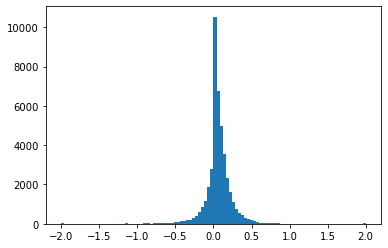

In [12]:
# histogram without outliers

plt.hist(np.clip(bankruptcy_data['X1'], -2, 2), bins=100)

<AxesSubplot:xlabel='X1'>

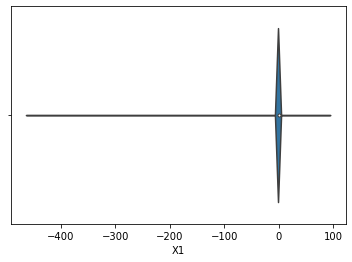

In [13]:
#violin plot of first column

sns.violinplot(x=bankruptcy_data['X1'])

<AxesSubplot:xlabel='X1'>

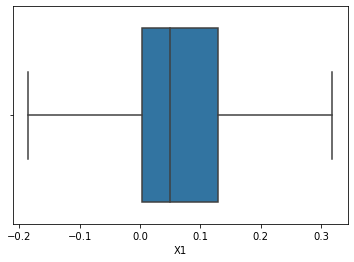

In [14]:
#boxplot of first column without outliers

sns.boxplot(x = 'X1', data = bankruptcy_data, showfliers = False)

<AxesSubplot:xlabel='X1'>

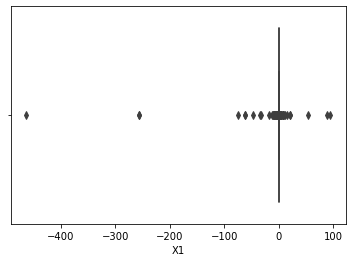

In [15]:
# boxplot of first column with outliers

sns.boxplot(x = 'X1', data = bankruptcy_data)

In [16]:
#load files

#histograms, boxplot, violin

#heatmap

#missing

#outliers

#impute
